### Unit 2, Lesson 2 - Building Your First Model; Naive Bayes

_**classification**and **regression** are the two main groups of supervised learning

_**Classification;** 
Outcome variable is categorical. The outcome of a classifier will eithe assign a category to a given test observation or it will assign a probability of each category. With classifier, the only out come that will be seen as possible have to be in the trainning set. So if the test set has a value for the outcome variable that was not in the training set it will not be able to predict it correctly.

_**Regression;** 
_In contrast to classification, regression models have a continuous outcome variable. As such regressions can output either on a bounded or unbounded number line. Example variables that would work for regression would be something like amount spent which could range from 0 to some potentially very large observable max, or temperature which ranges from absolute zero to again observably high (though any model would likely concentrate output in a more specific region). Many regression techniques can give predictions even beyond observed maxima and minima, while others are more bounded.

#### Building your first model; Naive Bayes

P(y|x) = P(y)P(x|y)/P(x)  = Bayes definition. 
_"the probability of y given x equals the probability of y times the probability of x given y divided by the probability of x."

This theorem can be extended to when x is a vector (containing the multiple x variables used as inputs for the model) to:

P(y|x1,...,xn)=P(y)P(x1,...,xn|y)/P(x1,...,xn)

_This explains the relationship of an outcome to a vector of conditions rather than to a single other event. Recall that this can be read as the probability of y, in the case of our model the categorical outcome we’re interested in, given a set of observations is equal to the probability of that set of observations given y divided by the probability of that set of outcomes.




#### Naive
_refers to the assumption that any pair of variables in the conditional vector (the x variables) are independent from each other. Thid condition allows us to break down P(x1|y) as below:

P(y|x1,...,xn)=P(y)∗P(x1|y)∗...∗P(xn|y)/P(x1,...,xn)

_We can even simplify further because for any observation we are attempting to predict, the x-vector will be constant, so that part of the probability simplifies out leaving: 

P(y|x1,...,xn)≈P(y)∗P(x1|y)∗...∗P(xn|y)

_**assumption;** the huge assuption here is that the columns of our dataset(x) are independent, which is not normally true.

_**Merit;** it is incredibly simple and fast


#### Classifiers

_There are three main classifiers: Bernoulli, Multinomial, and Gaussian Naive Bayes.

_Each classifier assumes that the distribution of the conditional (the aforementioned P(xi|y)) is the given distribution.

_**limitations.** A binomial only takes two possible values. A multinomial has discrete outcomes, and a Gaussian (also known as "normal") takes values along the continuous normal distribution. If your output variable distibution is yes or no for example youchoose Bernoulli, for something like ranking you choose Multinomial.

#### Improving Performance

_draw out the right feature based on your domain knoledge. This is very important as feature in Naive Bayes are equally weighted, heavilly correclated features must be identified and treated accordingly.

#### Downsides of Naive Bayes

_The first and most obvious downside of Naive Bayes is that assumption of independence.

_Naive Bayes can only predict the outcome of categories it has seen before.Like all classifiers it cannot predict a class it hasn’t seen before.

#### Guided example: spam filter

In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

##### creating feature with know spam keywords

In [81]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

##### what if the message contains all uppercase? It could make it a spam.

In [82]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()
print(sms_raw.head())

   spam                                            message  click  offer  \
0   ham  Go until jurong point, crazy.. Available only ...  False  False   
1   ham                      Ok lar... Joking wif u oni...  False  False   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...  False  False   
3   ham  U dun say so early hor... U c already then say...  False  False   
4   ham  Nah I don't think he goes to usf, he lives aro...  False  False   

   winner    buy   free   cash  urgent  allcaps  
0   False  False  False  False   False    False  
1   False  False  False  False   False    False  
2   False  False  False  False   False    False  
3   False  False  False  False   False    False  
4   False  False  False  False   False    False  


##### lets's check for correllation

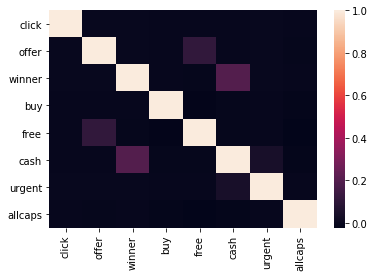

In [83]:
sns.heatmap(sms_raw.corr())

In [84]:
#This map is great, shows almost no correlation except for offer:free and winner:cash. We'll still keep them in our feeatures

##### building the training data
_SKlearn requires that we specify an outcome or dependent variable y and independent variable x which form the trainning set. This will be done under the title 'data' and 'target' below; 

In [85]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

print(data.head(), "\n")
print(target.head())

   click  offer  winner    buy   free   cash  urgent  allcaps
0  False  False   False  False  False  False   False    False
1  False  False   False  False  False  False   False    False
2  False  False   False  False  False  False   False    False
3  False  False   False  False  False  False   False    False
4  False  False   False  False  False  False   False    False 

0     ham
1     ham
2    spam
3     ham
4     ham
Name: spam, dtype: object


##### choosing a classifier

In [86]:
# Our data is binary / boolean (spam or ham), so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

##### instantiate our model  with a new variable

In [87]:
bnb = BernoulliNB()

##### Fit our model to the data.

In [88]:
bnb.fit(data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

##### Classify, storing the result in a new variable.

In [89]:
y_pred = bnb.predict(data)
print(y_pred)


['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


##### Display our results.

In [90]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
    
))

Number of mislabeled points out of a total 5572 points : 604


In [ ]:
Bayesian Poisoning
When implementing Naive Bayes, there is one more thing you must be aware of. Because Naive Bayes relies on probabilities
and these probabilities are often based around obvious keywords it is a vulnerable model. By that we mean that people can
manipulate the model. This is done through a process called Bayesian Poisoning.

In spam, this would be done through including words in your spam message that would be highly unlikely to be part of a spam
message. This would convince the model that the message is legitimate and let it into your inbox or wherever.

##### Bayesian Poisoning

In [ ]:
#since Bayesian rely on the probability of obvious keywords, the system could be poisoned. In this example this could
#be done by including words in the spam message that would highly unlikely to be a part of spam message (e.g spam). 
#this would convince the model that the messageis legitimate and let it into your inbox.

##### trying the Gausian classifier for the same problem

In [92]:
#import the Gaussian classifier and assign it to a new variable
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

#load in the trianing dataset and target dataset
gnb.fit(data, target)

#predict
y1_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y1_pred).sum()
    
))


Number of mislabeled points out of a total 5572 points : 604


In [ ]:
#the result for both classfiers(Berboulli and Gaussian) are exactly the same for this system